#### Questions to be answered

1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
7. Which lessons are least accessed?
8. Anything else I should be aware of?



In [1]:
import warnings  
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from env import get_db_url

In [2]:
import pandas as pd
import numpy as np################## Acquire Codeup Curriculum Log Data ##################
def get_codeup_data():
    '''
    Anonymized curriculum data with labeled columns
    '''
    colnames=['date', 'time', 'page_viewed','user_id','cohort_id','ip']
    df = pd.read_csv('anonymized-curriculum-access.txt',
    engine = 'python',
    header = None,
    index_col = False,
    names = colnames,
    sep = r'\s(?=(?:[^“]*“[^“]*“)*[^“]*$)(?![^\[]*\])',
    na_values = '“-”'
        )
    return df

def get_cohort_data():
    '''
    Cohort labeled data set
    '''
    df_cohorts = pd.read_csv('cohorts.csv')
    return df_cohorts

In [17]:
df1 = get_codeup_data()
df1.head(5)

,date,time,page_viewed,user_id,cohort_id,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [4]:
df.shape

(900223, 6)

In [13]:
df.isna().sum()

date               0
time               0
page_viewed        1
user_id            0
cohort_id      52893
ip                 0
dtype: int64

url = get_db_url('zillow')
query = '''
            
SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips, transactiondate, regionidzip
FROM properties_2017

LEFT JOIN propertylandusetype USING(propertylandusetypeid)
JOIN predictions_2017 USING (parcelid)

WHERE propertylandusedesc IN ("Single Family Residential",                       
                              "Inferred Single Family Residential")'''


data = pd.read_sql(query, url)
df = data.copy() #use copy to explore on

In [10]:
url = get_db_url('curriculum_logs')
query = """

SELECT * 
FROM logs;

"""

data = pd.read_sql(query, url)
df = data.copy()
df.head()

,date,time,path,user_id,cohort_id,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [6]:
df.shape

(900223, 6)

In [11]:
df.isna().sum()

date             0
time             0
path             1
user_id          0
cohort_id    52893
ip               0
dtype: int64

In [ ]:
#52893 cohort_id

In [19]:
print(df1 == df)

        date  time  page_viewed  user_id  cohort_id    ip
0       True  True         True     True       True  True
1       True  True         True     True       True  True
2       True  True         True     True       True  True
3       True  True         True     True       True  True
4       True  True         True     True       True  True
...      ...   ...          ...      ...        ...   ...
900218  True  True         True     True       True  True
900219  True  True         True     True       True  True
900220  True  True         True     True       True  True
900221  True  True         True     True       True  True
900222  True  True         True     True       True  True

[900223 rows x 6 columns]


In [7]:
url = get_db_url('curriculum_logs')
query = """

SELECT * 
FROM cohorts;

"""

data = pd.read_sql(query, url)
df = data.copy()
df.head()

,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
1,2,Badlands,#badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2,3,Carlsbad,#carlsbad,2014-09-04,2014-11-05,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
3,4,Denali,#denali,2014-10-20,2015-01-18,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
4,5,Everglades,#everglades,2014-11-18,2015-02-24,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1


In [8]:
df.shape

(53, 9)

In [9]:
df.isna().sum()

id             0
name           0
slack          0
start_date     0
end_date       0
created_at     0
updated_at     0
deleted_at    53
program_id     0
dtype: int64

In [ ]:
# 53 deleted_at

In [20]:
#determine if the dataframes are exactly the same
df1.equals(df)

True

In [21]:
#import csv

df = pd.read_csv('curriculum_access_data.csv')
df.head()

,Unnamed: 0,date,time,path,user_id,ip,name
0,0,2018-01-26,09:55:03,/,1,97.105.19.61,Hampton
1,1,2018-01-26,09:56:02,java-ii,1,97.105.19.61,Hampton
2,2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton
3,3,2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton
4,4,2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy


In [23]:
df.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)
df.head()

,date,time,path,user_id,ip,name
0,2018-01-26,09:55:03,/,1,97.105.19.61,Hampton
1,2018-01-26,09:56:02,java-ii,1,97.105.19.61,Hampton
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton
4,2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy


In [24]:
df.isna().sum()

date           0
time           0
path           1
user_id        0
ip             0
name       52893
dtype: int64

In [27]:
#display complete output in jupyter nb pd.set_option("display.max_rows", None, "display.max_columns", None)

pd.set_option("display.max_rows", 1182)

In [28]:
#see how many null values per date

df.pivot_table(index = 'date',
              values = ['date',
                        'time',
                        'path',
                        'user_id',
                        'ip',
                        'name'
                      
                       ],
              aggfunc = lambda x:x.isna().sum())

,ip,name,path,time,user_id
date,,,,,
2018-01-26,0,39,0,0,0
2018-01-27,0,0,0,0,0
2018-01-28,0,2,0,0,0
2018-01-29,0,47,0,0,0
2018-01-30,0,38,0,0,0
2018-01-31,0,52,0,0,0
2018-02-01,0,34,0,0,0
2018-02-02,0,50,0,0,0
2018-02-03,0,0,0,0,0


In [2]:
#import csv
df_1 = pd.read_csv('curriculum_access_data2.csv')
df_1.head()

,Unnamed: 0,date,time,path,user_id,ip,name,start_date,end_date,program_id
0,0,2018-01-26,09:55:03,/,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
1,1,2018-01-26,09:56:02,java-ii,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2,2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
3,3,2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
4,4,2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,2.0


In [3]:
#program_id 1, 2, & 4 are web development, 3 is Data Science
#df.loc[df['country'] == 'Taiwan Province of China', 'country'] = 'Taiwan'

df_1.head()

,Unnamed: 0,date,time,path,user_id,ip,name,start_date,end_date,program_id
0,0,2018-01-26,09:55:03,/,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
1,1,2018-01-26,09:56:02,java-ii,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2,2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
3,3,2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
4,4,2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,2.0


In [5]:
#drop duplicate index
df_1.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)

In [13]:
df_1.loc[df_1['program_id'] == 1.0, 'program_id'] = 'Web Development'
df_1.loc[df_1['program_id'] == 2.0, 'program_id'] = 'Web Development'
df_1.loc[df_1['program_id'] == 4.0, 'program_id'] = 'Web Development'         
df_1.loc[df_1['program_id'] == 3.0, 'program_id'] = 'Data Science'

df_1.head()

,date,time,path,user_id,ip,name,start_date,end_date,program_id
0,2018-01-26,09:55:03,/,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,Web Development
1,2018-01-26,09:56:02,java-ii,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,Web Development
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,Web Development
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,Web Development
4,2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,Web Development


In [14]:
df_1.isna().sum()

date              0
time              0
path              1
user_id           0
ip                0
name          52893
start_date    52893
end_date      52893
program_id    52893
dtype: int64

In [29]:
df_1.groupby('ip')['date'].sum()

ip
100.11.170.135     2020-07-202020-07-202020-07-202020-07-202020-0...
100.19.73.35       2020-05-272020-05-272020-05-272020-05-272020-0...
100.35.67.162      2018-02-112018-02-112018-02-112018-02-112018-0...
103.137.12.164     2019-12-122019-12-122019-12-122019-12-122019-1...
103.208.220.130                                           2019-04-13
                                         ...                        
99.97.210.12       2020-05-282020-05-282020-05-282020-05-282020-0...
99.98.245.245                                   2021-01-262021-01-26
99.98.32.165       2019-01-222019-01-222019-01-222019-02-012019-0...
99.98.32.97        2019-08-242019-08-242019-08-242019-08-242019-0...
99.98.36.168       2018-11-052018-11-052018-11-052018-11-052018-1...
Name: date, Length: 5531, dtype: object

In [16]:
def value_counts_and_frequencies(s: pd.Series, dropna=True) -> pd.DataFrame:
    return pd.merge(
        s.value_counts(dropna=False).rename('count'),
        s.value_counts(dropna=False, normalize=True).rename('proba'),
        left_index=True,
        right_index=True,
    )

In [18]:
ip_df = value_counts_and_frequencies(df_1.ip)
ip_df

,count,proba
97.105.19.58,284579,0.316121
97.105.19.61,61662,0.068496
192.171.117.210,9515,0.010570
71.150.217.33,6791,0.007544
76.185.145.231,4754,0.005281
...,...,...
172.58.109.140,1,0.000001
99.203.213.59,1,0.000001
99.203.212.173,1,0.000001
173.239.198.246,1,0.000001


In [22]:
#see how many null values per date
df_1.pivot_table(index = 'date',
              values = ['date',
                        'time',
                        'path',
                        'user_id',
                        'ip',
                        'name',
                        'start_date',
                        'end_date',
                        'program_id'
                      
                       ],
              aggfunc = lambda x:x.isna().sum())

,end_date,ip,name,path,program_id,start_date,time,user_id
date,,,,,,,,
2018-01-26,39,0,39,0,39,39,0,0
2018-01-27,0,0,0,0,0,0,0,0
2018-01-28,2,0,2,0,2,2,0,0
2018-01-29,47,0,47,0,47,47,0,0
2018-01-30,38,0,38,0,38,38,0,0
...,...,...,...,...,...,...,...,...
2021-04-17,48,0,48,0,48,48,0,0
2021-04-18,8,0,8,0,8,8,0,0
2021-04-19,0,0,0,0,0,0,0,0


<AxesSubplot:>

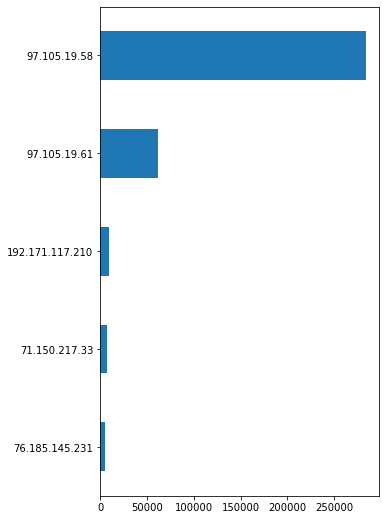

In [30]:
ip_df['count'].sort_values().tail(5).plot.barh(figsize=(5, 9))

Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [31]:
df_1.groupby('path')['program_id'].value_counts(ascending = False)

path                              program_id     
%20https://github.com/RaulCPena   Data Science        1
'                                 Web Development     1
,%20https://github.com/RaulCPena  Data Science        1
.git                              Web Development     1
.gitignore                        Data Science        1
                                                     ..
where                             Data Science        1
working-with-time-series-data     Data Science       14
                                  Web Development     1
wp-admin                          Web Development     1
wp-login                          Web Development     1
Name: program_id, Length: 2736, dtype: int64

In [37]:
df_1.groupby('program_id').path.value_counts(ascending = False)

program_id       path                                    
Data Science     /                                           8358
                 search/search_index.json                    2203
                 classification/overview                     1785
                 1-fundamentals/modern-data-scientist.jpg    1655
                 1-fundamentals/AI-ML-DL-timeline.jpg        1651
                                                             ... 
Web Development  web-design/ux                                  1
                 web-design/ux/layout/.json                     1
                 working-with-time-series-data                  1
                 wp-admin                                       1
                 wp-login                                       1
Name: path, Length: 2736, dtype: int64

In [32]:
df_1.path.value_counts(ascending = False)

/                                                               50313
search/search_index.json                                        19519
javascript-i                                                    18983
toc                                                             18297
java-iii                                                        13733
                                                                ...  
javascript/loops                                                    1
content/control-structures-ii                                       1
javascript-ii/promisesdfghjkjhgfs                                   1
app                                                                 1
appendix/professional-development/post-interview-review-form        1
Name: path, Length: 2313, dtype: int64

In [43]:
df_1.dtypes

date          object
time          object
path          object
user_id        int64
ip            object
name          object
start_date    object
end_date      object
program_id    object
dtype: object

In [85]:
#df = df[df.country != 'Korea, Dem. Rep.']
df1_edit = df_1[df_1.path != '/']
df1_edit.head()

,date,time,path,user_id,ip,name,start_date,end_date,program_id
1,2018-01-26,09:56:02,java-ii,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,Web Development
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,Web Development
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,Web Development
4,2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,Web Development
5,2018-01-26,09:56:41,javascript-i/loops,2,97.105.19.61,Teddy,2018-01-08,2018-05-17,Web Development


In [86]:
df1_edit.isna().sum()

date              0
time              0
path              1
user_id           0
ip                0
name          48434
start_date    48434
end_date      48434
program_id    48434
dtype: int64

In [46]:
pd.set_option("display.max_rows", 2736)
df_1.groupby('program_id')['path'].value_counts()

program_id       path                                                                                                                                                                                                                                                                                                                  
Data Science     /                                                                                                                                                                                                                                                                                                                          8358
                 search/search_index.json                                                                                                                                                                                                                                                                                                   220

#performing aggregation on
#group containing multiple
#keys
grp1 = df.groupby(['Name', 'Qualification'])
 
grp1.aggregate(np.sum)

In [53]:
#grp1 = df_1.groupby(['program_id', 'path'])
#grp1.aggregate(np.max)

# df.groupby(["FeatureID", "gene"]).agg(['max'])
#matches.groupby(["FeatureID", "gene"]).count().max(level=0)
#matches.groupby(["FeatureID", "gene"]).count().sort_values("pos").groupby(level=0).tail(1)

In [84]:
df_1.groupby(['program_id', 'path']).count().max(level = 0)

/var/folders/_5/m3rzmpjs6zj7q17m6nrmnw280000gn/T/ipykernel_6482/1898664733.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  df_1.groupby(['program_id', 'path']).count().max(level = 0).head()


,date,time,user_id,ip,name,start_date,end_date
program_id,,,,,,,
Data Science,8358,8358,8358,8358,8358,8358,8358
Web Development,37496,37496,37496,37496,37496,37496,37496


source.groupby(['Country','City'])['Short name'].agg(pd.Series.mode).to_frame()

In [83]:
df_1.groupby(['program_id', 'path'])['path'].agg(pd.Series.value_counts).to_frame()

path
program_id      path                                                     
Data Science    %20https://github.com/RaulCPena                         1
                ,%20https://github.com/RaulCPena                        1
                .gitignore                                              1
                /                                                    8358
                1-fundamentals                                         10
                1-fundamentals/1.1-intro-to-data-science             1633
                1-fundamentals/1.2-data-science-pipeline              651
                1-fundamentals/1.3-pipeline-demo                      300
                1-fundamentals/2.1-excel-overview                     203
                1-fundamentals/2.1-spreadsheets-overview               96
                1-fundamentals/2.2-excel-functions                    222
                1-fundamentals/2.2-functions                          123
                1-fundamentals/2.3-visualization                        4
                1-fundamentals/2.3-visualization-with-excel           323
                1-fundamentals/2.3-visualization.md                     5
                1-fundamentals/2.4-more-excel-features                214
                1-fundamentals/3-vocabulary                           152
                1-fundamentals/AI-ML-DL-timeline.jpg                 1651
                1-fundamentals/DataToAction_v2.jpg                    675
                1-fundamentals/modern-data-scientist.jpg             1655
                1-fundamentals/project                                 28
                1-overview                                              2
                1.2-data-science-pipeline                               5
                1.3-pipeline-demo                                       4
                10-anomaly-detection/1-overview                       751
                10-anomaly-detection/2-continuous-probabilistic...    163
                10-anomaly-detection/2-continuous-probabilistic...     28
                10-anomaly-detection/2-detecting-through-probab...     14
                10-anomaly-detection/3-detecting-timeseries-ano...      4
                10-anomaly-detection/3-discrete-probabilistic-m...    158
                10-anomaly-detection/3-discrete-probabilistic-m...      2
                10-anomaly-detection/4-detecting-timeseries-ano...    184
                10-anomaly-detection/4-detecting-with-clustering        3
                10-anomaly-detection/5-detecting-with-clustering      102
                10-anomaly-detection/AnomalyDetectionCartoon.jpeg     754
                10-anomaly-detection/exercises                          8
                10-anomaly-detection/isolation-forests                  2
                10-anomaly-detection/time-series-anomaly-detect...      7
                10-anomaly-detection/time-series-anomaly-detect...      3
                10-anomaly-detection/time-series-anomaly-detect...      2
                11-nlp/1-overview                                     129
                11-nlp/2-regular-expressions                          198
                11-nlp/3-acquire                                      253
                11-nlp/4-prepare                                      224
                11-nlp/5-explore                                      256
                11-nlp/6-model                                        243
                11-nlp/entity-labeling                                  7
                11-nlp/exercises                                       14
                11-nlp/github_repo_language.gif                       269
                11-nlp/pos-tagging                                      6
                11-nlp/project                                        263
                11-nlp/topic-modeling                                   3
                12-distributed-ml/1-overview                           89

In [ ]:
# df.groupby(['A', 'B'])['A'].count().unstack().max(axis=1)

In [80]:
df_1.groupby(['program_id', 'path'])['path'].count().unstack().max(axis = 1)

program_id
Data Science        8358.0
Web Development    37496.0
dtype: float64

In [81]:
df_1.groupby(['program_id', 'path'])['path'].value_counts().unstack().max(axis = 1)

program_id       path                                                                                                                                                                                                                                                                                                                  
Data Science     %20https://github.com/RaulCPena                                                                                                                                                                                                                                                                                               1.0
                 ,%20https://github.com/RaulCPena                                                                                                                                                                                                                                                                                            

In [88]:
#df_1.groupby('program_id')['path'].mode()

In [87]:
#df.nlargest(3, ['a', 'c'])
#df_1.nlargest(2, ['program_id', 'path' ])

In [ ]:
#classification/overview & javascript-i?

Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [47]:
pd.set_option("display.max_rows", 2736)

df_1.groupby(['program_id', 'name'])['path'].value_counts()

program_id       name   path                                    
Data Science     Bayes  /                                           1967
                        1-fundamentals/modern-data-scientist.jpg     650
                        1-fundamentals/AI-ML-DL-timeline.jpg         648
                        1-fundamentals/1.1-intro-to-data-science     640
                        search/search_index.json                     588
                                                                    ... 
Web Development  Zion   uploads/598dc43df39e2.jpg                      1
                        web-design/intro                               1
                        web-design/ui/visuals                          1
                        web-design/ux/layout                           1
                        web-design/ux/purpose                          1
Name: path, Length: 13565, dtype: int64

In [ ]:
# function to deal with parsing one entry in our log data
def parse_log_entry(entry):
    parts = entry.split()
    output = {}
    output['ip'] = parts[0]
    output['timestamp'] = parts[3][1:].replace(':', ' ', 1)
    output['request_method'] = parts[5][1:]
    output['request_path'] = parts[6]
    output['http_version'] = parts[7][:-1]
    output['status_code'] = parts[8]
    output['size'] = int(parts[9])
    output['user_agent'] = ' '.join(parts[11:]).replace('"', '')
    return pd.Series(output)

url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/logs'
df = pd.read_sql('SELECT * FROM api_access', url)
# df = pd.concat([df.entry, df.entry.apply(parse_log_entry)], axis=1)
df = df.entry.apply(parse_log_entry)
df.head()